<a href="https://colab.research.google.com/github/andreadosi1986/PrismaSVDUNet/blob/master/DecoderAnd3dUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install segmentation_models
!pip install rasterio
!pip install fiona
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 14.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.6 MB 14.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Install all dependencies for sgementation-models-3D library.
#We will use this library to call 3D unet.
#Alternative, you can define your own Unet, if you have skills!
!pip install classification-models-3D
!pip install efficientnet-3D
!pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

#Latest Tensorflow (2.4) is giving error for some of the libraries we will be using, 
# especially segmentation models 3D. 
#Therefore, I am defining TF version 1.x. 
#If you have your own 3D unet model, you can try the latest TF version.
#%tensorflow_version 1.x
     

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as animation
from matplotlib import rc
import rasterio
from rasterio import mask
import fiona
import skimage
from skimage.measure import regionprops
import random
import pandas as pd
from skimage import filters
import patchify
import tifffile as tiff
import tensorflow as tf
import keras
from scipy.ndimage import rotate
import fiona
from rasterio.plot import reshape_as_image
import tensorflow.keras.utils

In [ ]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Conv1D
from tensorflow.keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda, Reshape, MaxPooling1D, UpSampling1D


In [ ]:
brazil_mask = np.load('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilGtEsa4Classes.npy')
brazil_image = np.load('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilPrismaImage.npy')

In [ ]:
brazil_mask.shape

(950, 950)

In [ ]:
#brazil_mask[600:800, 200:400]

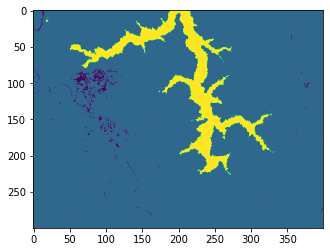

In [ ]:
plt.imshow(brazil_mask[600:900, 100:500])
plt.show()

In [ ]:
brazil_mask_test = brazil_mask[:, 600:950]
brazil_test = brazil_image[:, 600:950]
brazil_mask_test2 = brazil_mask[600:950, :]
brazil_test2 = brazil_image[600:950, :]

In [ ]:
# plt.imshow(brazil_mask_test)
# plt.show()
# plt.imshow(brazil_test[:,:,50])
# plt.show()
# print(brazil_test.shape)
# plt.imshow(brazil_mask_test2)
# plt.show()
# plt.imshow(brazil_test2[:,:,50])
# plt.show()
# print(brazil_test.shape)

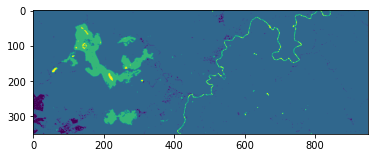

(350, 950)


In [ ]:
brazil_mask_test_rot =  np.rot90(brazil_mask_test)
plt.imshow(brazil_mask_test_rot)
plt.show()
print(brazil_mask_test_rot.shape)

In [ ]:
lst = []
for i in range (brazil_test.shape[2]):
  rot =  np.rot90(brazil_test[:,:,i])
  lst.append(rot)
brazil_test_rot = np.array(lst)

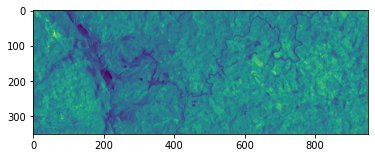

In [ ]:
plt.imshow(brazil_test_rot[50,:,:])
plt.show()

In [ ]:
brazil_test_rot.shape
brazil_test_rot = reshape_as_image(brazil_test_rot)
brazil_test_rot.shape

(350, 950, 181)

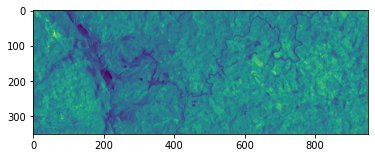

In [ ]:
plt.imshow(brazil_test_rot[:,:,50])
plt.show()

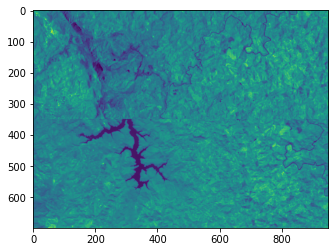

In [ ]:
brazil_tot = np.concatenate((brazil_test_rot, brazil_test2), axis = 0)
plt.imshow(brazil_tot[:,:,50])
plt.show()

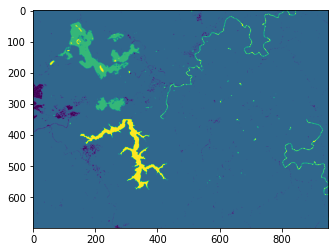

In [ ]:
brazil_mask_tot = np.concatenate((brazil_mask_test_rot, brazil_mask_test2), axis = 0)
plt.imshow(brazil_mask_tot)
plt.show()

In [ ]:
#build the 2d array for svd
autoenc_cube_brazil = np.reshape(brazil_tot, (brazil_tot.shape[0]*brazil_tot.shape[1], brazil_tot.shape[2]))
autoenc_cube_brazil.shape
autoenc_cube_brazil = np.expand_dims(autoenc_cube_brazil, axis = 2)

In [ ]:
print(autoenc_cube_brazil.shape)

(665000, 181, 1)


In [ ]:
final_image = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/FinalCustomImage.npy')
final_mask = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/FinalCustomMask.npy')

In [ ]:
sard_image = final_image.reshape(final_image.shape[0]*final_image.shape[1], final_image.shape[2])

In [ ]:
# #SPATIAL = sard_image.shape[0]
# BANDS = autoenc_cube_brazil.shape[1]

In [ ]:
#SPATIAL = sard_image.shape[0]
BANDS = sard_image.shape[1]

In [ ]:
custom_im = np.expand_dims(sard_image, axis = 2)

In [ ]:
print(custom_im.shape)

(420000, 181, 1)


In [ ]:
encoding_dim = 64

input_dim = Input(shape = (BANDS, ), name = 'InputLayer')

# Encoder Layers
encoded1 = Dense(100, activation = 'relu', name = 'EncodeLayer1')(input_dim)
encoded2 = Dense(90, activation = 'relu', name = 'EncodeLayer2')(encoded1)
encoded3 = Dense(85, activation = 'relu', name = 'EncodeLayer3')(encoded2)
encoded4 = Dense(80, activation = 'relu', name = 'EncodeLayer4')(encoded3)
encoded5 = Dense(75, activation = 'relu', name = 'EncodeLayer5')(encoded4)
encoded6 = Dense(70, activation = 'relu', name = 'EncodeLayer6')(encoded5)

# Coded Part
encoded7 = Dense(encoding_dim, activation = 'linear', name = 'CodeLayer')(encoded6)

# Decoder Layers
decoded1 = Dense(70, activation = 'relu', name = 'DecodeLayer1')(encoded7)
decoded2 = Dense(75, activation = 'relu', name = 'DecodeLayer2')(decoded1)
decoded3 = Dense(80, activation = 'relu', name = 'DecodeLayer3')(decoded2)
decoded4 = Dense(85, activation = 'relu', name = 'DecodeLayer4')(decoded3)
decoded5 = Dense(90, activation = 'relu', name = 'DecodeLayer5')(decoded4)
decoded6 = Dense(100, activation = 'relu', name = 'DecodeLayer6')(decoded5)
decoded7 = Dense(BANDS, activation = 'sigmoid', name = 'OutputLayer')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 181)]             0         
                                                                 
 EncodeLayer1 (Dense)        (None, 100)               18200     
                                                                 
 EncodeLayer2 (Dense)        (None, 90)                9090      
                                                                 
 EncodeLayer3 (Dense)        (None, 85)                7735      
                                                                 
 EncodeLayer4 (Dense)        (None, 80)                6880      
                                                                 
 EncodeLayer5 (Dense)        (None, 75)                6075      
                                                                 
 EncodeLayer6 (Dense)        (None, 70)                5320  

In [ ]:
# Compile the Model

autoencoder.compile(optimizer = 'adam', 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

folder_path = '/content/drive/MyDrive/datamining/prisma/Sardinia/'
## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = folder_path + 'DenseAutoencoderCustomImage3Channel3DCNN64Bands.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
#tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [ ]:
hist = autoencoder.fit(custom_im, 
                       custom_im, 
                       epochs = 100, 
                       batch_size = 256 , 
                       shuffle = True, 
                       callbacks=[early_stop,
                                  checkpoint,
                                    ])

Epoch 1/100
1641/1641 [==============================] - 10s 4ms/step - loss: 0.0025 - mean_squared_logarithmic_error: 0.0017
Epoch 2/100
1641/1641 [==============================] - 7s 4ms/step - loss: 4.0881e-05 - mean_squared_logarithmic_error: 3.2169e-05
Epoch 3/100
1641/1641 [==============================] - 7s 4ms/step - loss: 3.2625e-05 - mean_squared_logarithmic_error: 2.5615e-05
Epoch 4/100
1641/1641 [==============================] - 7s 4ms/step - loss: 2.8923e-05 - mean_squared_logarithmic_error: 2.2602e-05
Epoch 5/100
1641/1641 [==============================] - 7s 4ms/step - loss: 2.2634e-05 - mean_squared_logarithmic_error: 1.7568e-05
Epoch 6/100
1641/1641 [==============================] - 7s 4ms/step - loss: 2.0980e-05 - mean_squared_logarithmic_error: 1.6291e-05
Epoch 7/100
1641/1641 [==============================] - 7s 4ms/step - loss: 1.9559e-05 - mean_squared_logarithmic_error: 1.5203e-05
Epoch 8/100
1641/1641 [==============================] - 7s 4ms/step - loss:

In [ ]:
# Seperate encoder part from the auto encoder model

encoder = Model(inputs = input_dim, outputs = encoded7)

# Summary
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 181)]             0         
                                                                 
 EncodeLayer1 (Dense)        (None, 100)               18200     
                                                                 
 EncodeLayer2 (Dense)        (None, 90)                9090      
                                                                 
 EncodeLayer3 (Dense)        (None, 85)                7735      
                                                                 
 EncodeLayer4 (Dense)        (None, 80)                6880      
                                                                 
 EncodeLayer5 (Dense)        (None, 75)                6075      
                                                                 
 EncodeLayer6 (Dense)        (None, 70)                5320

In [ ]:
im_custom_reducted = encoder.predict(custom_im)

13125/13125 [==============================] - 15s 1ms/step


In [ ]:
print(im_custom_reducted.shape, np.min(im_custom_reducted), np.max(im_custom_reducted))

(420000, 64) -3.2004504 1.7484798


In [ ]:
final_im_reduced = im_custom_reducted.reshape(final_image.shape[0], final_image.shape[1], im_custom_reducted.shape[1])

In [ ]:
final_im_reduced.shape

(600, 700, 64)

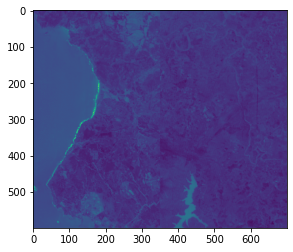

(600, 700, 64) 1.7484798 -3.2004504


In [ ]:
plt.imshow(final_im_reduced[:,:,4])
plt.show()
print(final_im_reduced.shape, np.max(final_im_reduced), np.min(final_im_reduced))

In [ ]:
#normalize from 0 to 1 (this sklearn function normalize only 2D array)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(im_custom_reducted)
custom_scaled = scaler.transform(im_custom_reducted)

In [ ]:
print(np.min(custom_scaled), np.max(custom_scaled))

0.0 1.0


In [ ]:
#custom image normalized
custom_norm = np.reshape(custom_scaled, (final_image.shape[0],final_image.shape[1],custom_scaled.shape[1]))

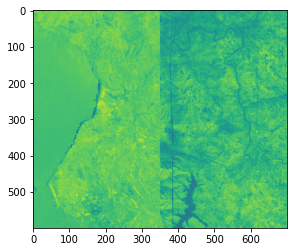

In [ ]:
plt.imshow(custom_norm[:,:,2])
plt.show()

In [ ]:
print(np.min(custom_norm), np.max(custom_norm), custom_norm.shape)

0.0 1.0 (600, 700, 64)


In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/CustomImage3BandsDec3DCNN64Bands', custom_norm)

In [ ]:
#### BUILD THE BRAZILIAN DATASET ######

In [ ]:
print(autoenc_cube_brazil.shape)


(665000, 181, 1)


In [ ]:
im_brazil_reducted = encoder.predict(autoenc_cube_brazil)

20782/20782 [==============================] - 24s 1ms/step


In [ ]:
print(im_brazil_reducted.shape, np.min(im_brazil_reducted), np.max(im_brazil_reducted))

(665000, 64) -2.4569778 1.4802561


In [ ]:
im_brazil_reducted_norm = scaler.transform(im_brazil_reducted)

In [ ]:
print(im_brazil_reducted_norm.shape, np.min(im_brazil_reducted_norm), np.max(im_brazil_reducted_norm))

(665000, 64) -0.25885874 1.1361568


In [ ]:
im_brazil_reducted_final = im_brazil_reducted_norm.reshape(brazil_tot.shape[0], brazil_tot.shape[1], im_brazil_reducted_norm.shape[1])


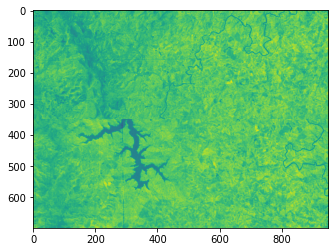

In [ ]:
plt.imshow(im_brazil_reducted_final[:,:,2])
plt.show()

In [ ]:
print(np.min(im_brazil_reducted_final), np.max(im_brazil_reducted_final))

-0.25885874 1.1361568


In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilImage3BandsDec3DCNN64Bands', im_brazil_reducted_final)

In [ ]:
##### BUILD THE TRAIN AND VAL SET : PATCHES AND DATA AUGM # 

In [ ]:
custom_norm = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/CustomImage3BandsDec3DCNN64Bands.npy')

In [ ]:
print(custom_norm.shape, np.min(custom_norm), np.max(custom_norm))

(600, 700, 64) 0.0 1.0


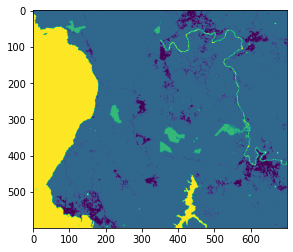

In [ ]:
plt.imshow(final_mask)
plt.show()

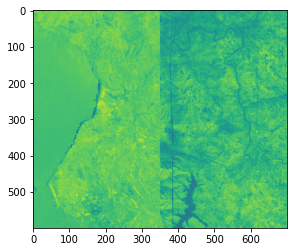

In [ ]:
plt.imshow(custom_norm[:,:,2])
plt.show()

In [ ]:
image_patches = patchify.patchify(custom_norm, (64,64,64), 30)

mask_patches = patchify.patchify(final_mask, (64,64), 30)

In [ ]:
print(image_patches.shape,mask_patches.shape)

(18, 22, 1, 64, 64, 64) (18, 22, 64, 64)


In [ ]:
#reshape patches in a 3d array
patches_res = image_patches.reshape(image_patches.shape[0] * image_patches.shape[1], image_patches.shape[3], image_patches.shape[4], image_patches.shape[5])
patches_mask_res = mask_patches.reshape(mask_patches.shape[0] * mask_patches.shape[1], mask_patches.shape[2], mask_patches.shape[3])

In [ ]:
print(np.unique(patches_mask_res), patches_mask_res.shape, patches_res.shape)

[0 1 2 3] (396, 64, 64) (396, 64, 64, 64)


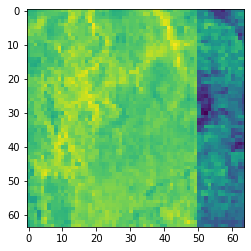

(64, 64, 64)


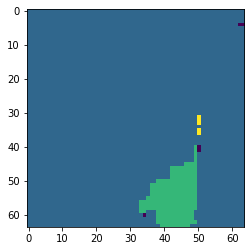

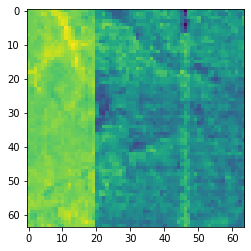

(64, 64, 64)


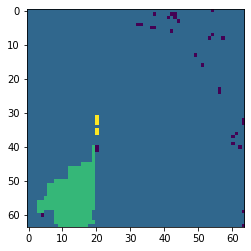

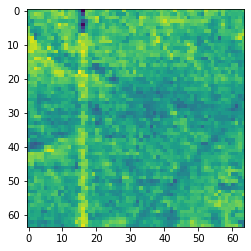

(64, 64, 64)


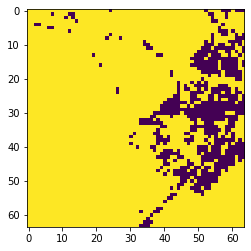

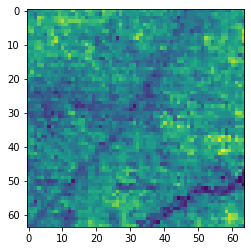

(64, 64, 64)


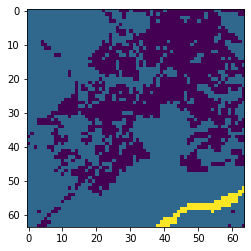

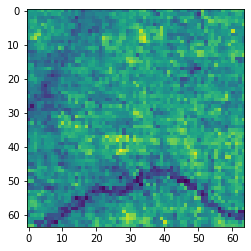

(64, 64, 64)


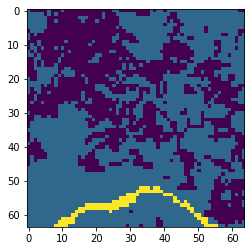

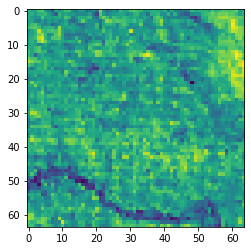

(64, 64, 64)


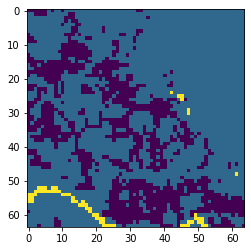

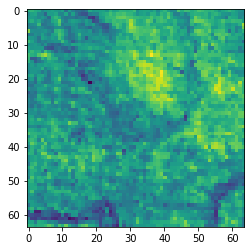

(64, 64, 64)


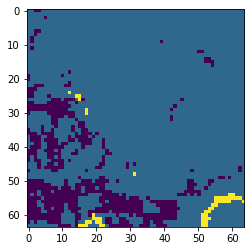

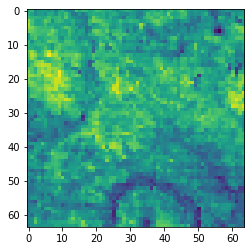

(64, 64, 64)


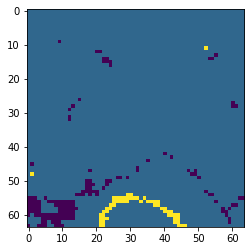

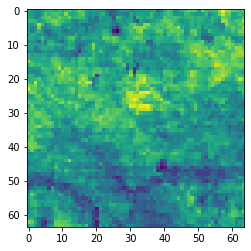

(64, 64, 64)


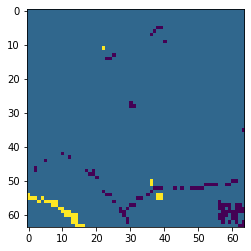

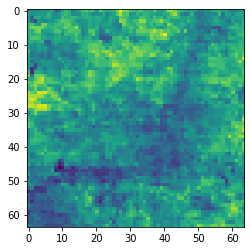

(64, 64, 64)


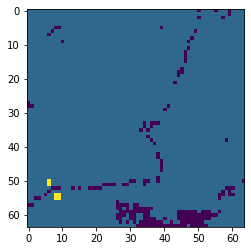

In [ ]:
#check if the picture and the mask are the same 
for i in range (10,20):
  plt.imshow(patches_res[i,:,:,2])
  plt.show()
  print(patches_res[i].shape) 
  plt.imshow(patches_mask_res[i])
  plt.show() 

In [ ]:
# Make sure the order of the spline interpolation is 0, default is 3. 
#With interpolation, the pixel values get messed up.
def rotation(image, seed):
    random.seed(seed)
    angle= random.randint(-180,180)
    r_img = rotate(image, angle, mode='reflect', reshape=False, order=0)
    return r_img

def h_flip(image, seed):
    random.seed(seed)
    hflipped_img= np.fliplr(image)
    return  hflipped_img

def v_flip(image, seed):
    random.seed(seed)
    vflipped_img= np.flipud(image)
    return vflipped_img

def v_transl(image, seed):
    random.seed(seed)
    n_pixels = random.randint(-64,64)
    vtranslated_img = np.roll(image, n_pixels, axis=0)
    return vtranslated_img

def h_transl(image, seed):
    random.seed(seed)
    n_pixels = random.randint(-64,64)
    htranslated_img = np.roll(image, n_pixels, axis=1)
    return htranslated_img

In [ ]:
# ######  custom data augmentation  #######

# lst_temp = list(patches_res)
# lst_temp_mask = list(patches_mask_res)

# for i in range (patches_res.shape[0]):
#   patches_res_i = patches_res[i,:,:]
#   patches_mask_res_i = patches_mask_res[i,:,:]

#   lst_temp.extend((rotation(patches_res_i, i), h_flip(patches_res_i, i), v_flip(patches_res_i, i), v_transl(patches_res_i, i), h_transl(patches_res_i, i)))
#   lst_temp_mask.extend((rotation(patches_mask_res_i, i), h_flip(patches_mask_res_i, i), v_flip(patches_mask_res_i, i), v_transl(patches_mask_res_i, i), h_transl(patches_mask_res_i, i)))

# patches_res = np.array(lst_temp)
# patches_mask_res = np.array(lst_temp_mask)

In [ ]:
#print(patches_res.shape, patches_mask_res.shape)

(2376, 64, 64, 64) (2376, 64, 64)


In [ ]:
#SECOND DATA AUGMENTATION: ADD RANDOM NOICE ONLY TO THE PATCHES WITH MINING AREA. THEN FLIP, TRANSLATE ECC...

temp_lst_noise = list(patches_res)
temp_lst_mask = list(patches_mask_res)
num = 2
for i in range (len(patches_res)):
  if num in temp_lst_mask[i]:
    mu = np.mean(patches_res[i,:,:])
    noise = np.random.normal(mu, 0.0015, (patches_res[i,:,:].shape[0], patches_res[i,:,:].shape[1], patches_res[i,:,:].shape[2]))
    patches_noise_i = noise + temp_lst_noise[i]
    patches_noise_i = temp_lst_noise[i]

    patches_mask_res_i = temp_lst_mask[i]
    temp_lst_noise.extend((patches_noise_i,rotation(patches_noise_i, i), h_flip(patches_noise_i, i), v_flip(patches_noise_i, i), v_transl(patches_noise_i, i), h_transl(patches_noise_i, i)))
    temp_lst_mask.extend((patches_mask_res_i,rotation(patches_mask_res_i, i), h_flip(patches_mask_res_i, i), v_flip(patches_mask_res_i, i), v_transl(patches_mask_res_i, i), h_transl(patches_mask_res_i, i)))


In [ ]:
#check how many patches with mining area
mining_pixel = 2
n = 0
index_of_mining = []
for i in range (len(temp_lst_noise)):
  if mining_pixel in temp_lst_mask[i]:
    n=n+1
    index_of_mining.append(i)
print("the patches with mining are", n, ", the percentage is", n/len(temp_lst_mask)*100,"%")

the patches with mining are 516 , the percentage is 60.99290780141844 %


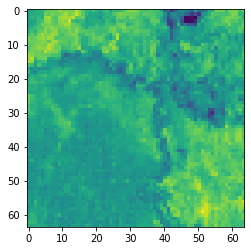

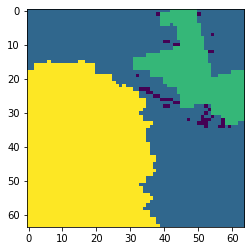

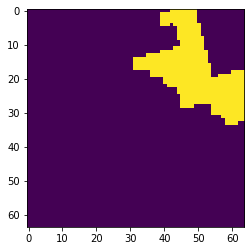

In [ ]:
#check if all the augmented patches having mining pixels have really mining pixels
import random
i = random.randint(0, len(index_of_mining))
j = index_of_mining[i]
plt.imshow(temp_lst_noise[j][:,:,2])
plt.show()
plt.imshow(temp_lst_mask[j])
plt.show()
#check if the mining areas exixt
plt.imshow(temp_lst_mask[j]==2)
plt.show()

In [ ]:
patches_res = np.array(temp_lst_noise)
patches_mask_res = np.array(temp_lst_mask)
print(patches_res.shape, patches_mask_res.shape)

(846, 64, 64, 64) (846, 64, 64)


In [ ]:
patches_res = np.stack((patches_res,)*3, axis=-1)
patches_mask_res = np.stack((patches_mask_res,)*64, axis=-1)
print(patches_res.shape, patches_mask_res.shape)

(846, 64, 64, 64, 3) (846, 64, 64, 64)


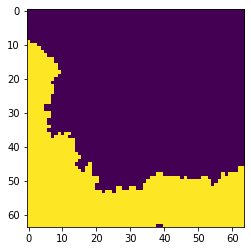

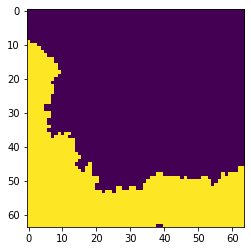

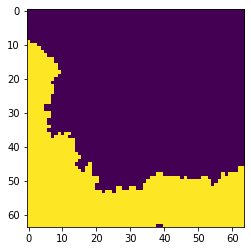

In [ ]:
plt.imshow(patches_mask_res[0,:,:,1])
plt.show()
plt.imshow(patches_mask_res[0,:,:,2])
plt.show()
plt.imshow(patches_mask_res[0,:,:,63])
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64BandsPatches', patches_res)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64BandsPatchesMask', patches_mask_res)

In [ ]:
######## RESTART KERNEL, LAD LIB AND DATA ########

In [ ]:
# patches_res = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64BandsPatches.npy')
# patches_mask_res = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64BandsPatchesMask.npy')

In [ ]:
#print(patches_res.shape, patches_mask_res.shape)

(5022, 64, 64, 64) (5022, 64, 64)


In [ ]:
# #THIRD DATA AUGMENTATION: Augment ONLY TO THE PATCHES WITH MINING AREA. 

# #temp_lst_noise = list(patches_res)
# temp_list_image = list(patches_res)
# temp_lst_mask = list(patches_mask_res)
# #temp_list_image = temp_lst_noise

# num = 2
# for i in range (len(patches_res)):
#   if num in temp_lst_mask[i]:
#     #mu = np.mean(patches_res[i,:,:])
#     #noise = np.random.normal(mu, 0.025, (patches_res[i,:,:].shape[0], patches_res[i,:,:].shape[1]))
#     #patches_noise_i = noise + temp_lst_noise[i]
#     patches_i = temp_list_image[i]
#     patches_mask_res_i = temp_lst_mask[i]
#     temp_list_image.extend((patches_i,rotation(patches_i, i), h_flip(patches_i, i), v_flip(patches_i, i), v_transl(patches_i, i), h_transl(patches_i, i)))
#     temp_lst_mask.extend((patches_mask_res_i,rotation(patches_mask_res_i, i), h_flip(patches_mask_res_i, i), v_flip(patches_mask_res_i, i), v_transl(patches_mask_res_i, i), h_transl(patches_mask_res_i, i)))


In [ ]:
# #check how many patches with pixel area
# mining_pixel = 2
# n = 0
# index_of_mining = []
# for i in range (len(temp_list_image)):
#   if mining_pixel in temp_lst_mask[i]:
#     n=n+1
#     index_of_mining.append(i)
# print("the patches with mining are", n, ", the percentage is", n/len(temp_lst_mask)*100,"%")

In [ ]:
# #check if all the augmented patches having mining pixels have really mining pixels
# import random
# i = random.randint(0, len(index_of_mining))
# j = index_of_mining[i]
# plt.imshow(temp_list_image[j][:,:,2])
# plt.show()
# plt.imshow(temp_lst_mask[j])
# plt.show()
# plt.imshow(temp_lst_mask[j]==2)
# plt.show()

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/datamining/prisma/Sardinia/temp_list_image", "wb") as fp:   #Pickling
#   pickle.dump(temp_list_image, fp)

# with open("/content/drive/MyDrive/datamining/prisma/Sardinia/temp_lst_mask", "wb") as fp:   #Pickling
#   pickle.dump(temp_lst_mask, fp)

In [ ]:
# patches_res = np.array(temp_list_image)
# patches_mask_res = np.array(temp_lst_mask)
# print(patches_res.shape, patches_mask_res.shape)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(patches_res, patches_mask_res, test_size = 0.2, random_state = 0)

In [ ]:
from tensorflow.keras.utils import to_categorical
n_classes=4 
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], y_train.shape[3], n_classes))
val_masks_cat = to_categorical(y_val, num_classes=n_classes)
y_val_cat = val_masks_cat.reshape((y_val.shape[0], y_val.shape[1], y_val.shape[2], y_val.shape[3], n_classes))

In [ ]:
print(X_train.shape, y_train_cat.shape, X_val.shape, y_val_cat.shape)

(676, 64, 64, 64, 3) (676, 64, 64, 64, 4) (170, 64, 64, 64, 3) (170, 64, 64, 64, 4)


In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_train', X_train)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train', y_train)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_val', X_val)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val', y_val)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train_cat', y_train_cat)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val_cat', y_val_cat)


In [ ]:
## RESTART KERKEL #####

In [ ]:
# X_train = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_train.npy')
# y_train = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train.npy')
# X_val = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_val.npy')
# y_val = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val.npy')
# y_train_cat = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train_cat.npy')
# y_val_cat = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val_cat.npy')

In [ ]:
# X_train = np.stack((X_train,)*3, axis=-1)
# X_val = np.stack((X_val,)*3, axis=-1)

In [ ]:
#y_train = np.stack((y_train,)*64, axis=-1)

In [ ]:
#y_val = np.stack((y_val,)*64, axis=-1)

In [ ]:
#print(y_train.shape, y_val.shape)

In [ ]:
# plt.imshow(y_train[100,:,:, 1])
# plt.show()

# plt.imshow(y_train[100,:,:, 10])
# plt.show()

# plt.imshow(y_val[100,:,:, 1])
# plt.show()

# plt.imshow(y_val[100,:,:, 10])
# plt.show()

In [ ]:
# plt.imshow(X_train[0,:,:,1,0])
# plt.show()
# plt.imshow(X_train[0,:,:,1,1])
# plt.show()
# plt.imshow(X_train[0,:,:,1,2])
# plt.show()

# print(X_train.shape, X_val.shape)

In [ ]:
# from tensorflow.keras.utils import to_categorical
# n_classes=4 
# train_masks_cat = to_categorical(y_train, num_classes=n_classes)
# y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2],  y_train.shape[3], n_classes))
# val_masks_cat = to_categorical(y_val, num_classes=n_classes)
# y_val_cat = val_masks_cat.reshape((y_val.shape[0], y_val.shape[1], y_val.shape[2], y_val.shape[3], n_classes))

In [ ]:
#print(y_train_cat.shape, y_val_cat.shape, np.unique(y_train), np.unique(y_val))

In [ ]:
# np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_train', X_train)
# np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_val', X_val)

In [ ]:
# np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train_cat', y_train_cat)
# np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val_cat', y_val_cat)

In [ ]:
# np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val', y_val)
# np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train', y_train)

In [ ]:
## RESTART KERKEL AND SWITCH TO GPU #####

In [ ]:
X_train = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_train.npy')
y_train = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train.npy')
X_val = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_X_val.npy')
y_val = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val.npy')
y_train_cat = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_train_cat.npy')
y_val_cat = np.load('/content/drive/MyDrive/datamining/prisma/Sardinia/64Band_y_val_cat.npy')

In [ ]:
print(X_train.shape, X_val.shape, y_train_cat.shape, y_val_cat.shape)

(676, 64, 64, 64, 3) (170, 64, 64, 64, 3) (676, 64, 64, 64, 4) (170, 64, 64, 64, 4)


In [ ]:
import segmentation_models_3D as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:

#Define parameters for our model.

encoder_weights = 'imagenet'
BACKBONE = 'vgg16'  #Try vgg16, efficientnetb7, inceptionv3, resnet50
activation = 'softmax'
patch_size = 64
n_classes = 4
channels=3

LR = 0.0001
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25, 0.25, 0.25])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [ ]:
#Define the model. Here we use Unet but we can also use other model architectures from the library.
model = sm.Unet(BACKBONE, classes=n_classes, 
                input_shape=(patch_size, patch_size, patch_size, channels), 
                encoder_weights=encoder_weights,
                activation=activation)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

176606448/176606448 [==============================] - 31s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv3D)          (None, 64, 64, 64,   5248        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv3D)          (None, 64, 64, 64,   110656      ['block1_conv1[0][0]']           
                          

In [ ]:
# #Define the model. Here we use Unet but we can also use other model architectures from the library.
# model = sm.Unet(BACKBONE, classes=n_classes, 
#                 input_shape=(patch_size, patch_size, patch_size, channels), 
#                 encoder_weights=encoder_weights,
#                 activation=activation)

# model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])
# print(model.summary())

In [ ]:
#Fit the model
import time
start = time.time()

history=model.fit(X_train, 
          y_train_cat,
          batch_size=16, 
          epochs=300,
          verbose=1,
          validation_data=(X_val, y_val_cat),
          shuffle=True)

minutes = (time.time() - start)/60
print("Total model fit time: ", minutes , "minutes")

Epoch 1/300
43/43 [==============================] - 17s 385ms/step - loss: 0.7816 - iou_score: 0.8454 - f1-score: 0.9056 - val_loss: 0.7939 - val_iou_score: 0.7943 - val_f1-score: 0.8681
Epoch 2/300
43/43 [==============================] - 16s 371ms/step - loss: 0.7852 - iou_score: 0.8268 - f1-score: 0.8927 - val_loss: 0.7936 - val_iou_score: 0.7965 - val_f1-score: 0.8693
Epoch 3/300
43/43 [==============================] - 16s 372ms/step - loss: 0.7827 - iou_score: 0.8382 - f1-score: 0.9005 - val_loss: 0.7928 - val_iou_score: 0.7999 - val_f1-score: 0.8718
Epoch 4/300
43/43 [==============================] - 16s 372ms/step - loss: 0.7828 - iou_score: 0.8375 - f1-score: 0.9005 - val_loss: 0.7937 - val_iou_score: 0.7957 - val_f1-score: 0.8688
Epoch 5/300
43/43 [==============================] - 16s 372ms/step - loss: 0.7828 - iou_score: 0.8359 - f1-score: 0.8990 - val_loss: 0.7929 - val_iou_score: 0.7989 - val_f1-score: 0.8709
Epoch 6/300
43/43 [==============================] - 16s 371

In [ ]:

#Save model for future use
model.save('/content/drive/MyDrive/datamining/prisma/Sardinia/3D_model_vgg16_400epochs.h5')

In [ ]:
prediction = model.predict(X_val)

6/6 [==============================] - 1s 214ms/step


In [ ]:
prediction.shape

(170, 64, 64, 64, 4)

In [ ]:
predicted_img=np.argmax(prediction, axis=4)

In [ ]:
predicted_img.shape

(170, 64, 64, 64)

In [ ]:
# plt.imshow(predicted_img[45])
# plt.show()
# print(np.unique(predicted_img))

PREDICTION


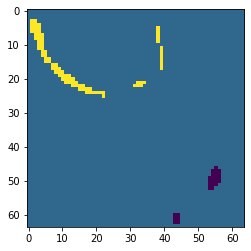

[0 1 3]
GROUND TRUTH


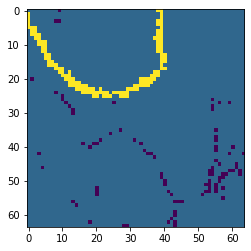

[0 1 3]


In [ ]:
import random
i = random.randint(0, prediction.shape[0])
#predicted_img=np.argmax(prediction, axis=3)[i,:,:]
print("PREDICTION")
plt.imshow(predicted_img[i,:,:, 0])
plt.show()
print(np.unique(predicted_img[i,:,:, 0]))
print("GROUND TRUTH")
plt.imshow(y_val[i,:,:, 0])
plt.show()
print(np.unique(y_val[i,:,:, 0]))

PREDICTION1


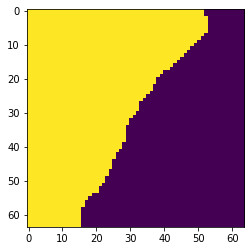

PREDICTION2


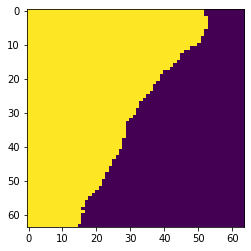

12 17 42


In [ ]:
import random
i = random.randint(0, prediction.shape[0])
j = random.randint(0, 63)
z = random.randint(0, 63)
#predicted_img=np.argmax(prediction, axis=3)[i,:,:]
print("PREDICTION1")
plt.imshow(predicted_img[i,:,:, j])
plt.show()
print("PREDICTION2")
plt.imshow(predicted_img[i,:,:, z])
plt.show()
print(i,j, z)

In [ ]:
#### take only the best prediction compare to the GT #####
lst = [];
for i in range (predicted_img.shape[0]):
  lst_sum = []
  for j in range (predicted_img.shape[3]):
    diff_arr = y_val[i,:,:,j] - predicted_img[i,:,:,j]
    diff_arr = np.where(diff_arr != 0, 1, diff_arr)
    lst_sum.append(np.sum(diff_arr))
  min_index = lst_sum.index(min(lst_sum))
  lst.append(predicted_img[i, :, :, min_index])

In [ ]:
print(len(lst), lst[1].shape)

170 (64, 64)


In [ ]:
predicted_img = np.array(lst)
print(predicted_img.shape)

(170, 64, 64)


PREDICTION


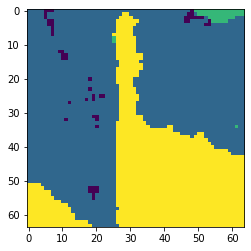

[0 1 2 3]
GROUND TRUTH


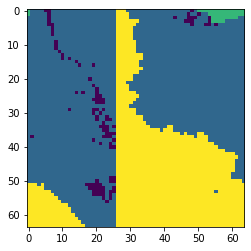

[0 1 2 3]


In [ ]:
import random
i = random.randint(0, prediction.shape[0])
#predicted_img=np.argmax(prediction, axis=3)[i,:,:]
print("PREDICTION")
plt.imshow(predicted_img[i,:,:])
plt.show()
print(np.unique(predicted_img[i,:,:]))
print("GROUND TRUTH")
plt.imshow(y_val[i,:,:, 0])
plt.show()
print(np.unique(y_val[i,:,:, 0]))

In [ ]:
##################################################

#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_val[:,:,:,0], predicted_img)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])
#class5_IoU = values[4,4]/(values[4,4] + values[4,0] + values[4,1] + values[4,2] + values[0,4]+ values[1,4]+ values[2,4])
#class6_IoU = values[5,5]/(values[5,5] + values[5,0] + values[5,1] + values[5,2] + values[0,5]+ values[1,5]+ values[2,5])

print("IoU for build up is: ", class1_IoU)
print("IoU for veg area: ", class2_IoU)
#print("IoU for sparse veg is: ", class3_IoU)
print("IoU for mining area is: ", class3_IoU)
print("IoU for water is: ", class4_IoU)
#print("IoU for urban area is: ", class6_IoU)


#plt.imshow(train_images[0, :,:,0], cmap='gray')
#plt.imshow(train_masks[0, :,:,0], cmap='gray')
#######################################################################

Mean IoU = 0.84307784
[[1.5017e+04 6.8020e+03 4.5000e+01 2.9000e+01]
 [5.0710e+03 5.6490e+05 2.4280e+03 1.3500e+03]
 [1.5000e+01 1.8490e+03 3.5997e+04 1.2000e+01]
 [3.6000e+01 1.2930e+03 3.2000e+01 6.1444e+04]]
IoU for build up is:  0.5558764
IoU for veg area:  0.9678033
IoU for mining area is:  0.8915003
IoU for water is:  0.95713127


In [ ]:
###### BRAZILIAN TEST SET ########

In [ ]:
im_brazil_reducted_final = np.load('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilImage3BandsDec3DCNN64Bands.npy')

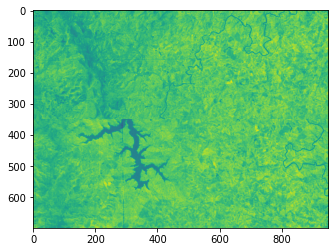

-0.25885874 1.1361568


In [ ]:
plt.imshow(im_brazil_reducted_final[:,:,2])
plt.show()
print(np.min(im_brazil_reducted_final), np.max(im_brazil_reducted_final))

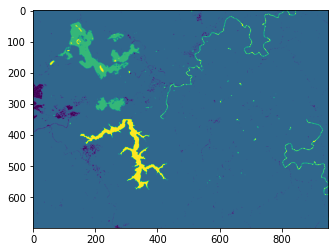

In [ ]:
plt.imshow(brazil_mask_tot)
plt.show()

In [ ]:
# divide the image in non overlapping pathces
patches_bra = patchify.patchify(im_brazil_reducted_final, (64,64,64), step = 64)

In [ ]:
patches_res_bra = patches_bra.reshape(patches_bra.shape[0] * patches_bra.shape[1], patches_bra.shape[3], patches_bra.shape[4], patches_bra.shape[5])

In [ ]:
patches_res_bra.shape

(140, 64, 64, 64)

In [ ]:
patches_res_bra = np.stack((patches_res_bra,)*3, axis=-1)
#patches_mask_res = np.stack((patches_mask_res,)*64, axis=-1)

In [ ]:
print(patches_res_bra.shape)

(140, 64, 64, 64, 3)


In [ ]:
prediction_bra = model.predict(patches_res_bra)

5/5 [==============================] - 2s 547ms/step


In [ ]:
prediction_bra.shape

(140, 64, 64, 64, 4)

In [ ]:
prediction_bra = np.argmax(prediction_bra, axis = 4)

In [ ]:
prediction_bra.shape

(140, 64, 64, 64)

In [ ]:
#patch the mask
#divide the mask in non overlapping patches
patches_mask_bra = patchify.patchify(brazil_mask_tot, (64,64), step = 64)
patches_mask_res_bra = patches_mask_bra.reshape(patches_mask_bra.shape[0] * patches_mask_bra.shape[1], patches_mask_bra.shape[2], patches_mask_bra.shape[3])


In [ ]:
print(patches_mask_res_bra.shape)

(140, 64, 64)


In [ ]:
#### take only the best prediction compare to the GT #####
lst = [];
for i in range (prediction_bra.shape[0]):
  lst_sum = []
  for j in range (prediction_bra.shape[3]):
    diff_arr = patches_mask_res_bra[i,:,:] - prediction_bra[i,:,:,j]
    diff_arr = np.where(diff_arr != 0, 1, diff_arr)
    lst_sum.append(np.sum(diff_arr))
  min_index = lst_sum.index(min(lst_sum))
  lst.append(prediction_bra[i, :, :, min_index])

In [ ]:
predicted_img_bra = np.array(lst)
print(predicted_img_bra.shape)

(140, 64, 64)


17


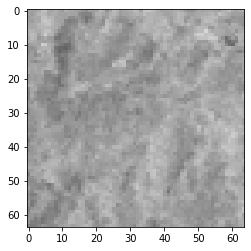

17  the minimum is  -0.17929143
GROUND TRUTH


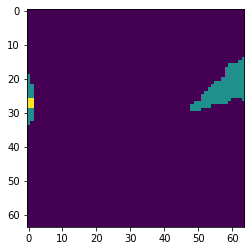

[1 2 3]
PREDICTION


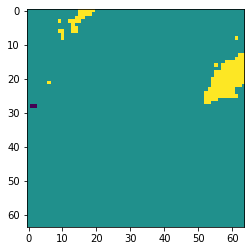

[0 1 2]


In [ ]:
import random
i = random.randint(0, 34)
print(i)
plt.imshow(patches_res_bra[i][:,:,2])
plt.show()
print(i, " the minimum is ", np.min(patches_res_bra[i]))
print("GROUND TRUTH")
plt.imshow(patches_mask_res_bra_new[i])
plt.show()
print(np.unique(patches_mask_res_bra_new[i]))
print("PREDICTION")
plt.imshow(predicted_img_bra[i])
plt.show()
print(np.unique(predicted_img_bra[i]))

In [ ]:
##################################################
#### first brazil area ########
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(patches_mask_res_bra_new, predicted_img_bra)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])
#class5_IoU = values[4,4]/(values[4,4] + values[4,0] + values[4,1] + values[4,2] + values[0,4]+ values[1,4]+ values[2,4])
#class6_IoU = values[5,5]/(values[5,5] + values[5,0] + values[5,1] + values[5,2] + values[0,5]+ values[1,5]+ values[2,5])

print("IoU for build up is: ", class1_IoU)
print("IoU for veg area: ", class2_IoU)
#print("IoU for sparse veg is: ", class3_IoU)
print("IoU for mining area is: ", class3_IoU)
print("IoU for water is: ", class4_IoU)
#print("IoU for urban area is: ", class6_IoU)


#plt.imshow(train_images[0, :,:,0], cmap='gray')
#plt.imshow(train_masks[0, :,:,0], cmap='gray')
#######################################################################

Mean IoU = 0.62765753
[[2.36200e+03 1.89200e+03 3.00000e+00 1.00000e+00]
 [1.95400e+03 5.35878e+05 3.58700e+03 1.20500e+03]
 [7.60000e+01 4.35100e+03 1.06050e+04 8.20000e+01]
 [2.40000e+01 3.45400e+03 2.44000e+02 7.72200e+03]]
IoU for build up is:  0.37420785
IoU for veg area:  0.97022927
IoU for mining area is:  0.5596897
IoU for water is:  0.6065033


In [ ]:
bazil_prd_patches = predicted_img_bra.reshape(10,14,64,64)

In [ ]:
brazil_mask_tot[0:640, 0:896].shape

(640, 896)

In [ ]:
from patchify import unpatchify 
unpatched_prediction = unpatchify(bazil_prd_patches, (10*64, 14*64))

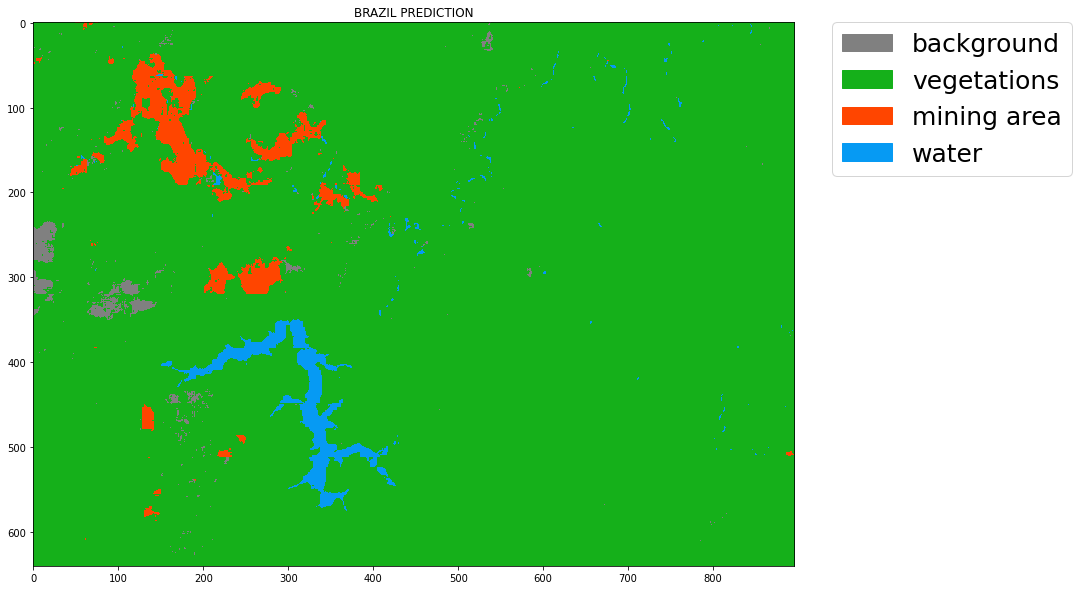

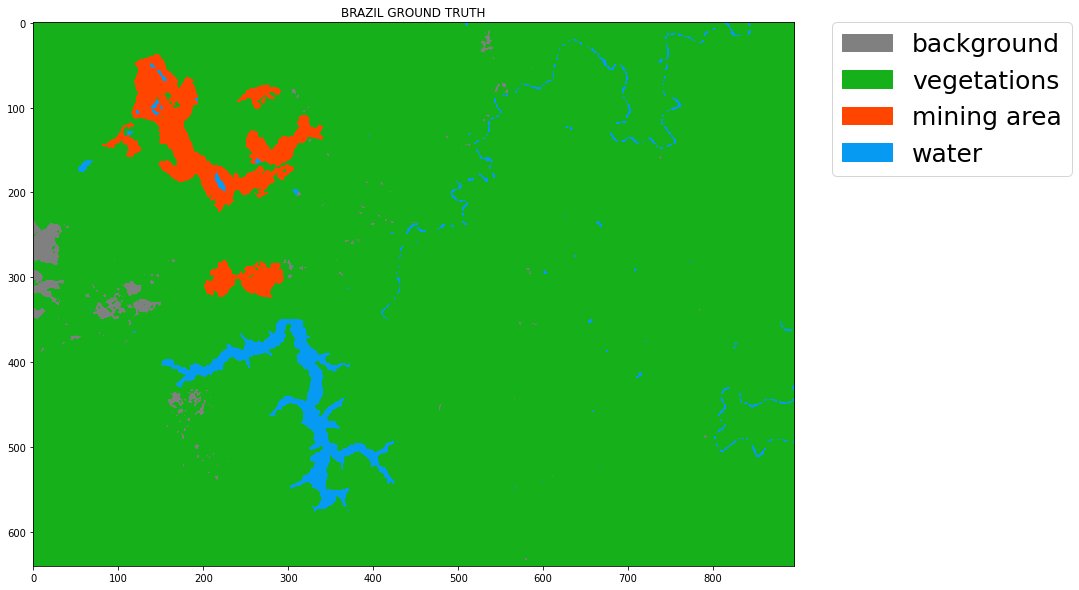

In [ ]:
import matplotlib.patches as mpatches
## PLOT BRAZIL PREDICTION
values = np.unique(unpatched_prediction)
label = ["background", "vegetations","mining area", "water"]
colors = ['gray', '#15B01A', '#FF4500', '#069AF3']
bounds = [0,1,2,3,4]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(20,10))
plt.title("BRAZIL PREDICTION")
im_gr_tr = plt.imshow(unpatched_prediction, interpolation='none', cmap=cmap, norm=norm)
#plt.figure(figsize=(24,12))
colors = [im_gr_tr.cmap(im_gr_tr.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label=label[i])  for i in range(len(values))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2,  prop={'size': 25}, borderaxespad=0. )
#plt.savefig("/content/drive/MyDrive/datamining/prisma/Brazil/Predictio3Enc.pdf", format = 'pdf', bbox_inches='tight')
#plt.savefig("/content/drive/MyDrive/datamining/prisma/Brazil/PredictionNew.png", format = 'png', bbox_inches='tight')

plt.show()


import matplotlib.patches as mpatches
## PLOT BRAZIL GT
values = np.unique(brazil_mask_bra_new)
label = ["background", "vegetations","mining area", "water"]
colors = ['gray', '#15B01A', '#FF4500', '#069AF3']
bounds = [0,1,2,3,4]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(20,10))
plt.title("BRAZIL GROUND TRUTH")
im_gr_tr = plt.imshow(brazil_mask_bra_new[0:640, 0:896], interpolation='none', cmap=cmap, norm=norm)
#plt.figure(figsize=(24,12))
colors = [im_gr_tr.cmap(im_gr_tr.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label=label[i])  for i in range(len(values))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2,  prop={'size': 25}, borderaxespad=0. )
#plt.savefig("/content/drive/MyDrive/datamining/prisma/Brazil/GroundTruth3Enc.pdf", format = 'pdf', bbox_inches='tight')
#plt.savefig("/content/drive/MyDrive/datamining/prisma/Brazil/PredictionNew.png", format = 'png', bbox_inches='tight')

plt.show()



In [ ]:
import scipy
brazil_mask_bra_new = scipy.signal.medfilt2d(brazil_mask_tot, kernel_size=(3,3))


In [ ]:
brazil_mask_bra_new.shape

(700, 950)

(700, 950) [0 1 2 3]


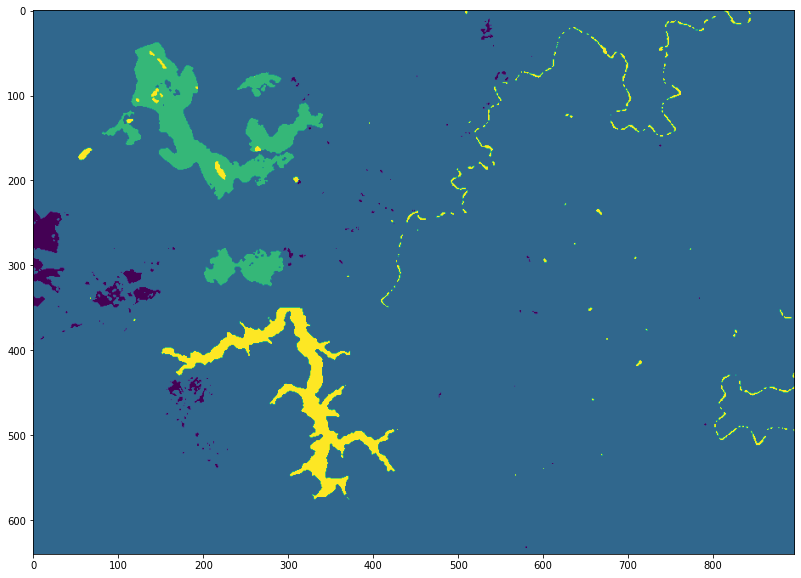

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(brazil_mask_bra_new[0:640, 0:896])
plt.show
print(brazil_mask_bra_new.shape, np.unique(brazil_mask_bra_new))

In [ ]:
#patch the mask
#divide the mask in non overlapping patches
patches_mask_bra_new = patchify.patchify(brazil_mask_bra_new, (64,64), step = 64)
patches_mask_bra_new.shape
patches_mask_res_bra_new = patches_mask_bra_new.reshape(patches_mask_bra_new.shape[0] * patches_mask_bra_new.shape[1], patches_mask_bra_new.shape[2], patches_mask_bra_new.shape[3])


In [ ]:
patches_mask_res_bra_new.shape

(140, 64, 64)